## Name: Aditya Satpute

In [51]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv('Event_entry.csv')  ## Load data

In [53]:
df.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [54]:
df['Order'].nunique() ### Order can be dropped since it is unique for each record

869

In [55]:
df.shape

(869, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


### EDA

<Axes: xlabel='Age', ylabel='Count'>

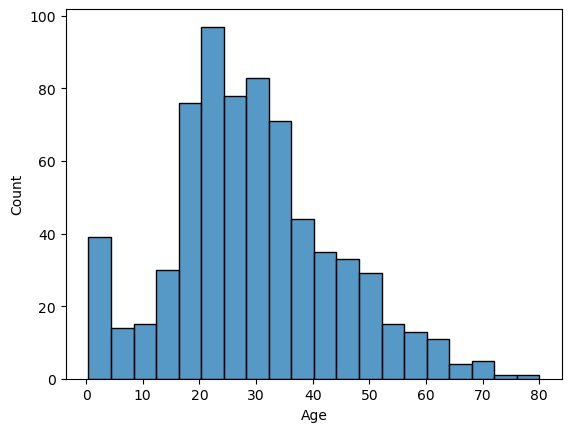

In [57]:
sns.histplot(df['Age'].dropna())
## Majority of the population is young adults

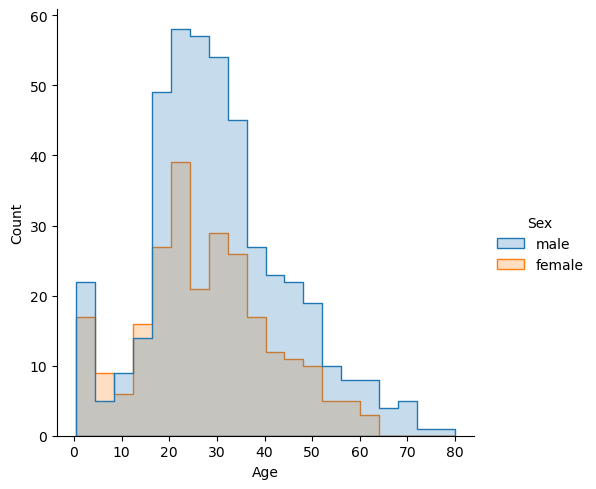

In [58]:
sns.displot(data=df, x='Age', hue='Sex', element='step', stat='count', common_norm=False)

## It can be observed that 20-30 year age band is most represented in both genders

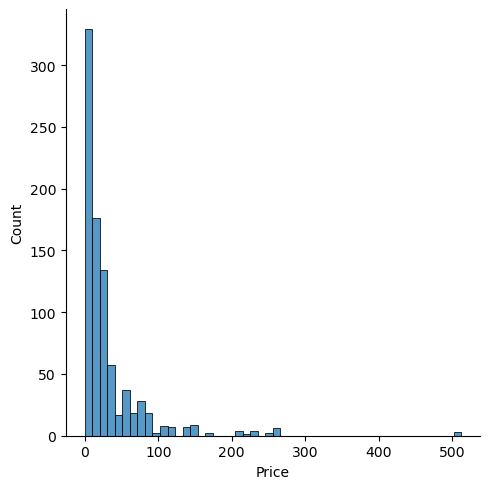

In [59]:
sns.displot(df['Price'], bins = 50)
## Majority of the tickets are priced within $ 100. We have an outlier observation with price > $500

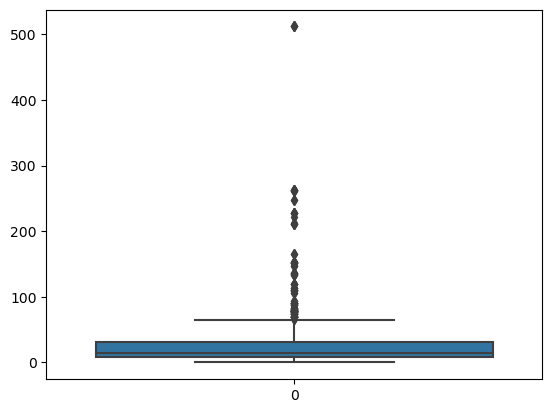

In [60]:
sns.boxplot(df['Price']) ## Check boxplot of price
## we can observe some clear outliers in price with price>500. We can drop them

df = df.loc[df['Price']<500, :] ## Remove outliers

<Axes: xlabel='Bank Balance', ylabel='Count'>

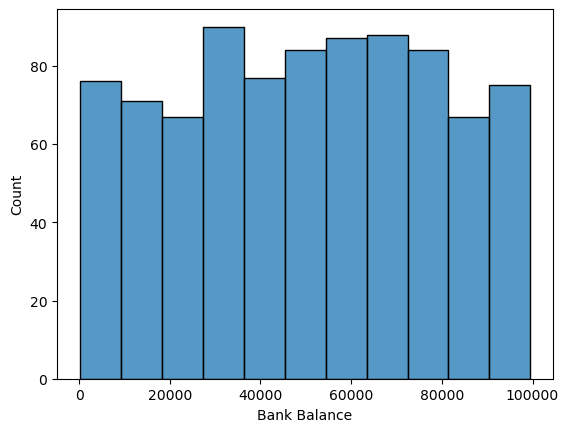

In [61]:
sns.histplot(df['Bank Balance']) ## Bank balances are almost uniformly distributed

Text(0.5, 1.0, 'Gender count')

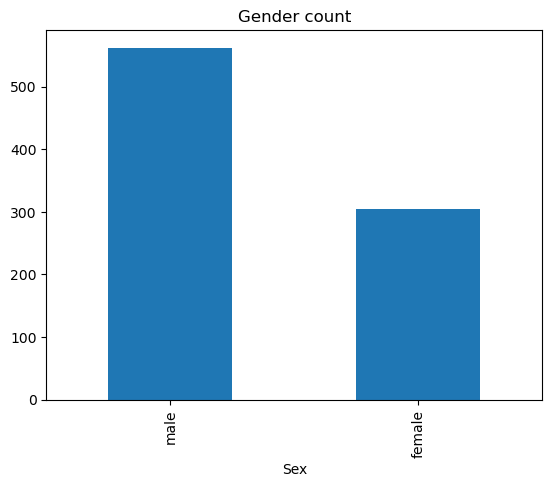

In [62]:
df['Sex'].value_counts().plot(kind = 'bar')
plt.title('Gender count')
## Males are more represented than females in the data

Text(0.5, 1.0, 'Ticket class distribution')

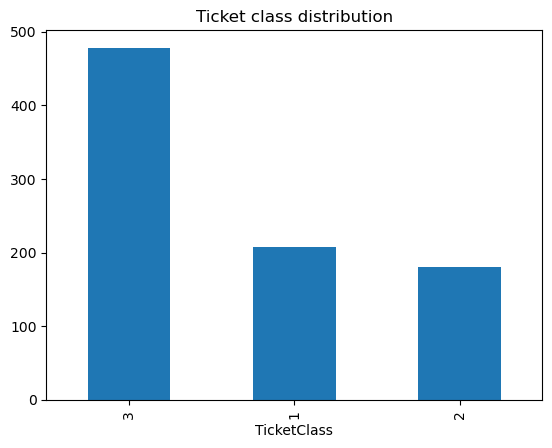

In [63]:
df['TicketClass'].value_counts().plot(kind = 'bar')
plt.title('Ticket class distribution')
## Ticket class 3 highly represented

<Axes: xlabel='Sex', ylabel='Entry'>

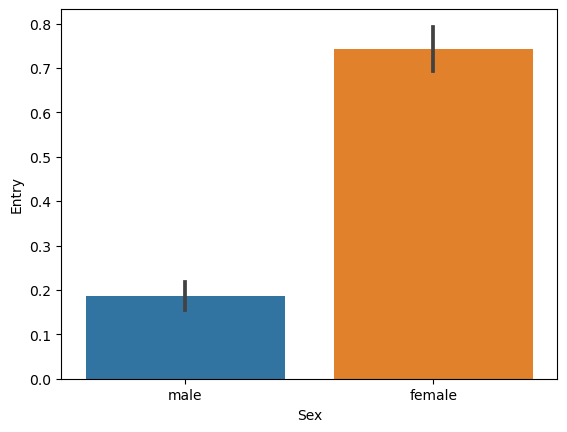

In [64]:
sns.barplot(x = 'Sex', y = 'Entry', data = df)
## it can be observed that more females are allowed entry than males in terms of %

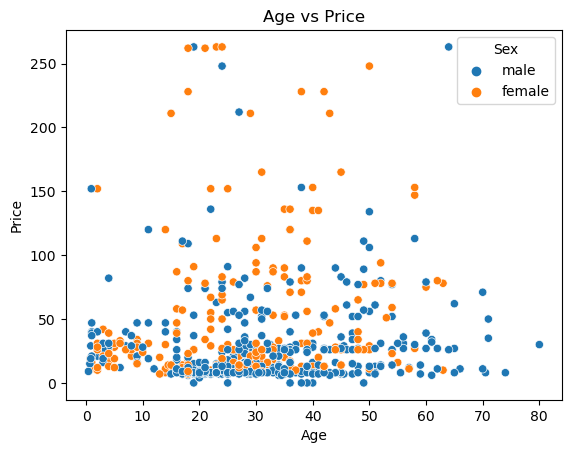

In [65]:
sns.scatterplot(x = 'Age', y = 'Price', hue = 'Sex', data = df)
plt.title('Age vs Price')
plt.show()
## as age increases, prices are relatively low,
## Older people are more likely to be males
## Price distribution by gender looks approximately similar

## Data preparation

In [66]:
df_1 = df.copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          866 non-null    int64  
 1   TicketClass    866 non-null    int64  
 2   Sex            866 non-null    object 
 3   Age            691 non-null    float64
 4   Price          866 non-null    int64  
 5   Order          866 non-null    int64  
 6   Name           866 non-null    object 
 7   Ticket Number  866 non-null    int64  
 8   Bank Balance   866 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 67.7+ KB


In [67]:
df_1['Age'] = df_1.groupby(['Sex', 'TicketClass'])['Age'].transform(lambda x: x.fillna(x.mean()))
## group fill age mean for NAs in Age column

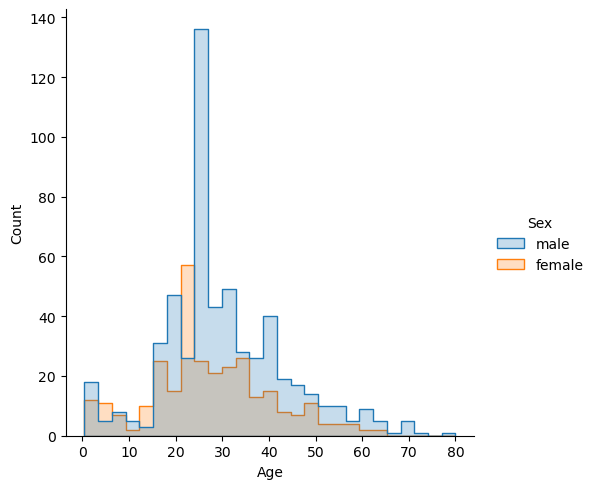

In [68]:
sns.displot(data=df_1, x='Age', hue='Sex', element='step', stat='count', common_norm=False)
## it can be seen that grouped mean is skewing the ages too much

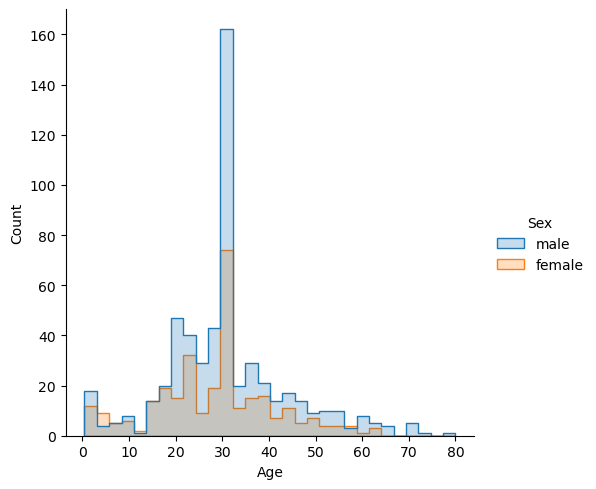

In [69]:
df_2 = df.copy()
df_2['Age'] = df_2['Age'].fillna(df_2['Age'].mean())
sns.displot(data=df_2, x='Age', hue='Sex', element='step', stat='count', common_norm=False)
## it can be seen that mean fill is also skewing the ages too much
## Hence, dropping na columns

In [70]:
df = df.dropna() ## Drop NAs since imputation is leading to skewed distribution

In [71]:
df['Ticket Number'].value_counts() ## values are unique and hence can be dropped

Ticket Number
648155    1
188492    1
944108    1
172183    1
348296    1
         ..
309480    1
569448    1
451316    1
436077    1
942774    1
Name: count, Length: 691, dtype: int64

In [72]:
df = df.drop(['Order', 'Name', 'Ticket Number'], axis = 1) ## Drop unrequired variables with unique values

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 867
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entry         691 non-null    int64  
 1   TicketClass   691 non-null    int64  
 2   Sex           691 non-null    object 
 3   Age           691 non-null    float64
 4   Price         691 non-null    int64  
 5   Bank Balance  691 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 37.8+ KB


In [74]:
## Standardize continuous variables
from sklearn.preprocessing import StandardScaler

df_std = df.copy()

continuous_columns = df_std.select_dtypes(include=['float64', 'int64']).columns.difference(['Entry', 'TicketClass'])
## Avoiding stadardizing categorical variables

scaler = StandardScaler()
df_std[continuous_columns] = scaler.fit_transform(df_std[continuous_columns]) ## Standardize continuous variables

#df_std['Age'] = pd.Series(StandardScaler().fit_transform(df_std['Age']))
#df_std['Price'] = pd.Series(StandardScaler().fit_transform(df_std['Price']))
#df_std['Bank Balance'] = pd.Series(StandardScaler().fit_transform(df_std['Bank Balance']))

In [75]:
## Create dummies
df_std['TicketClass'] = df_std['TicketClass'].astype('object')
cat_cols = ['TicketClass', 'Sex']

df_dummies = pd.get_dummies(df_std, columns = cat_cols, drop_first = True)

In [76]:
## Make dummies into 0s and 1s
df_dummies[['TicketClass_2', 'TicketClass_3', 'Sex_male']] = df_dummies[['TicketClass_2', 'TicketClass_3', 'Sex_male']].astype(int)

## Model development

In [77]:
## Function to calculate deviance and model R2

def deviance(y, pred):
    y = np.array(y)
    pred = np.array(pred)
    return -2 * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
         
def R2(y, y_train, pred):
    dev_val = deviance(y, pred)
    dev0 = deviance(y, [np.mean(y_train)])
    return 1 - dev_val / dev0

In [78]:
## Logistic Regression model

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

y = df_dummies['Entry']

X = df_dummies.drop('Entry', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Statsmodels GLM for interpretation
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
pred = logit.predict(X_test)
logit.summary()

## Interpretations:

## for every year increase in age log odds of entry reduces by 0.03
## Price of ticket and bank balance are not statistically significant in decding entry
## Log odds of entry reduces by 1.14 for class 2 compared to class 1, reduces by 2.3 for class 3 compared to class 1
## Log odds of entry is 2.4 times less than for females

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Entry   No. Observations:                  552
Model:                            GLM   Df Residuals:                      545
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -256.81
Date:                Sat, 24 Feb 2024   Deviance:                       513.62
Time:                        23:21:28   Pearson chi2:                     597.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3421
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8513      0.361      7.895      0.000       2.143       3.559
Age              -0.6029      0.128     -4.716      0.000      -0.853      -0.352
Price            -0.2220      0.154     -1.438      0.150      -0.525       0.081
Bank Balance      0.0021      0.109      0.019      0.985      -0.211       0.216
TicketClass_2    -1.5541      0.386     -4.028      0.000      -2.310      -0.798
TicketClass_3    -2.7616      0.410     -6.736      0.000      -3.565      -1.958
Sex_male         -2.4890      0.238    -10.450      0.000      -2.956      -2.022
=================================================================================
"""

In [79]:
## Performance evaluation of Logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pred))
print("Model OOS R2:", R2(y = pd.Series(y_test), y_train = y_train, pred = pred))

## It can be observed that the model can predict well and is better than the null model as it's ROC AUC is ~0.9 and OOS is decent ~0.4

Accuracy: 0.8129496402877698
Precision: 0.7586206896551724
ROC AUC: 0.8844664371772806
Model OOS R2: 0.3786142537498919


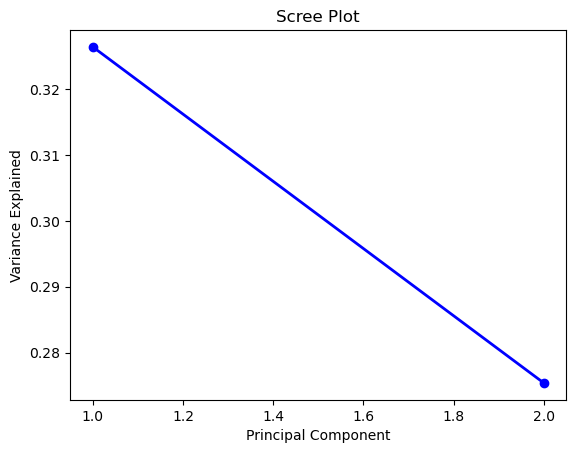

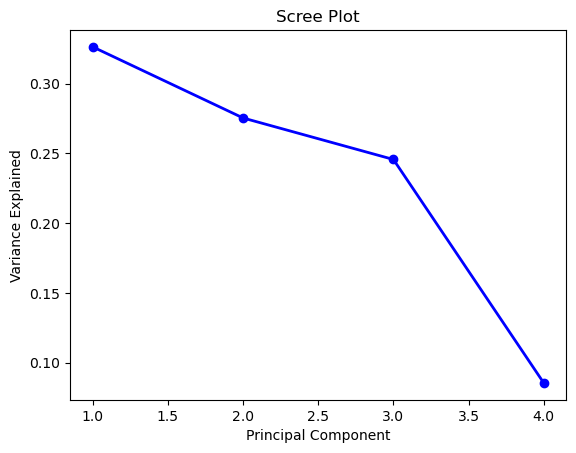

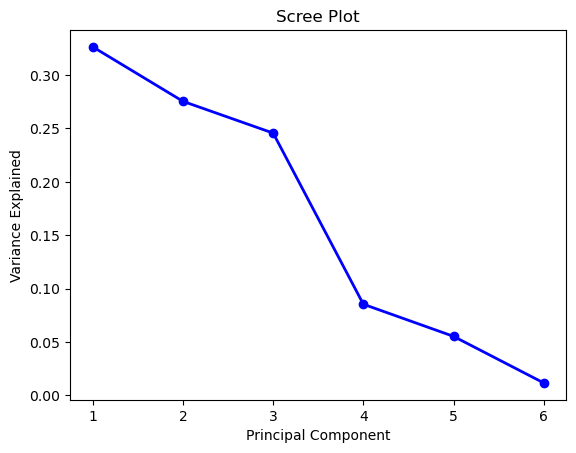

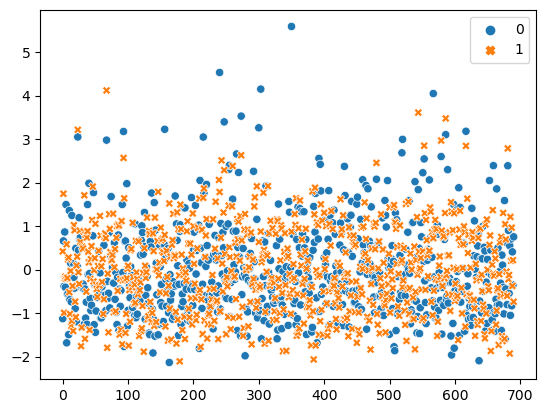

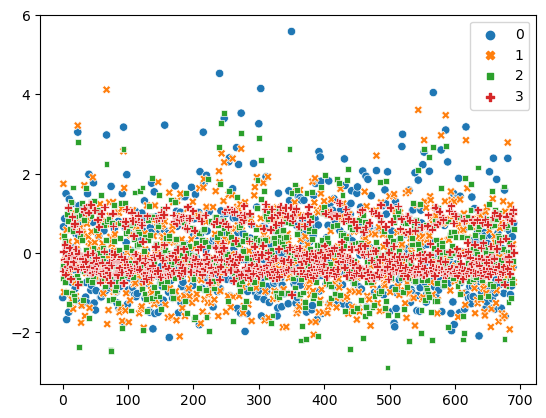

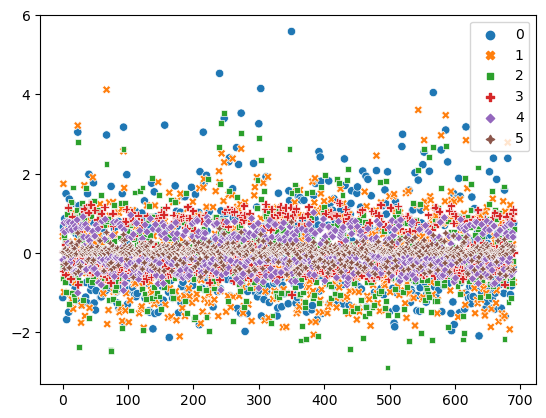

In [80]:
## PCA
from sklearn.decomposition import PCA

## PCA with 2 dimensions
pca_2 = PCA(n_components = 2)
X_2 = pca_2.fit_transform(X)

## PCA with 4 dimensions
pca_4 = PCA(n_components = 4)
X_4 = pca_4.fit_transform(X)

## PCA with 6 dimensions
pca_6 = PCA(n_components = 6)
X_6 = pca_6.fit_transform(X)

## PCA plots for 2, 4, 6 components
components = [2, 4, 6]

for i in components:
    pca = PCA(n_components = i).fit(X)
    PC_values = np.arange(pca.n_components_) + 1
    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()

for i in components:
    pca = PCA(n_components = i).fit(X)
    sns.scatterplot(pca.fit_transform(X))
    plt.show()

## The Scree plots show the amount of explained per principal component
## The amount of explained variance increases as the number of principal components increases
## It can be observed that as the number of components increase, differentiating between the groups becomes a problem
## But as the number of dimensions increase, it can be seen that separate groups/ clusters with characteristics can be observed

In [81]:
## Logistic regression with PCs

## 2 components
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
prob = log_model.predict_proba(X_test)[:, 1]

print("2 components:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pred))
print("Model OOS R2:", R2(y = pd.Series(y_test), y_train = y_train, pred = prob))
print("\n")

## 4 components
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
prob = log_model.predict_proba(X_test)[:, 1]

print("4 components:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pred))
print("Model OOS R2:", R2(y = pd.Series(y_test), y_train = y_train, pred = prob))
print("\n")

## 6 components
X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
prob = log_model.predict_proba(X_test)[:, 1]

print("6 components:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pred))
print("Model OOS R2:", R2(y = pd.Series(y_test), y_train = y_train, pred = prob))
print("\n")

## It can be observed that OOS R2 increases with the increase in the number of components. 
## These observations are in line with the explained variance plots above
## A regular logistic regression model has a better OOS R2 compared to PCR
## But the accuracy and precision of the model are much better than logistic model. This may be attributed to the fact that the 
## variables are scaled for PCA as PCA is sensitive to scale

2 components:
Accuracy: 0.6330935251798561
Precision: 0.6470588235294118
ROC AUC: 0.8844664371772806
Model OOS R2: 0.07108764657250533


4 components:
Accuracy: 0.7194244604316546
Precision: 0.673469387755102
ROC AUC: 0.8844664371772806
Model OOS R2: 0.17180857320972887


6 components:
Accuracy: 0.8129496402877698
Precision: 0.7586206896551724
ROC AUC: 0.8844664371772806
Model OOS R2: 0.37497678337365237




In [82]:
## LASSO Logistic regression 

from sklearn.linear_model import LogisticRegressionCV

rlogit = LogisticRegressionCV(penalty='l1', solver ='liblinear', cv = 10, random_state = 0).fit(X_train, y_train) ## Find ideal C = 1 / lambda
## i.e smaller C => larger penalty

best_C = rlogit.C_[0]

model = LogisticRegression(penalty='l1', solver ='liblinear', C = best_C).fit(X_train, y_train)

y_pred = log_model.predict(X_test)
prob = log_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, prob))
print("Model OOS R2:", R2(y = pd.Series(y_test), y_train = y_train, pred = prob))

## The LASSO Logistic Regression's performance and scores are exactly equal to the PCA with 6 componenets

Accuracy: 0.8129496402877698
Precision: 0.7586206896551724
ROC AUC: 0.8842512908777969
Model OOS R2: 0.37497678337365237


## Decision Tree Analysis

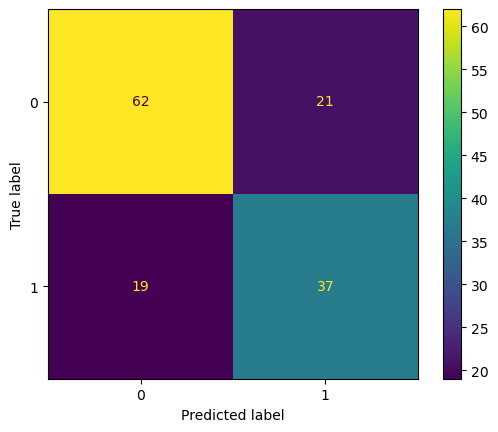

Accuracy: 0.7122302158273381
Precision: 0.6379310344827587
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 7}
Best score: 0.7789285714285714


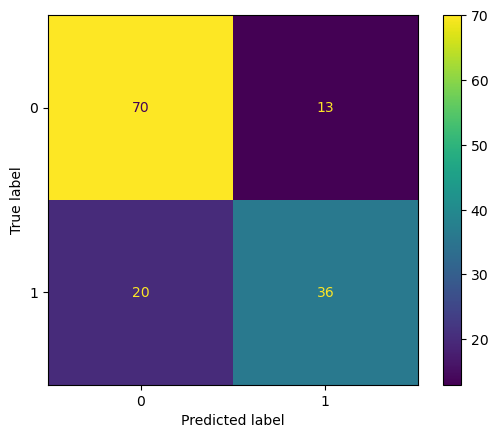

Accuracy: 0.762589928057554
Precision: 0.7346938775510204


In [83]:
## Decision trees do not require scaling. But, using scaled data to maintain consitency when comparing preformance across models
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree_model.classes_)
disp.plot()
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
## It can be observed that the preformance is not as great

## Hyperparameter tuning

params = {'max_depth': [3, None], 'min_samples_leaf': randint(1,9), 'criterion': ['gini', 'entropy']}

tree = DecisionTreeClassifier()
treeCV = RandomizedSearchCV(tree, params, cv = 10, random_state = 0)
treeCV.fit(X_train, y_train)

print(f"Best parameters: {treeCV.best_params_}")
print(f"Best score: {treeCV.best_score_}")

y_pred = treeCV.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = treeCV.classes_)
disp.plot()
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
## It can be observed that the accuracy and precision for the tuned model is better than the untuned one 
## The confusion Matrix cleary shows that the fine tuned model performs better than the untuned model

## K means Clustering

<Axes: xlabel='Age', ylabel='Price'>

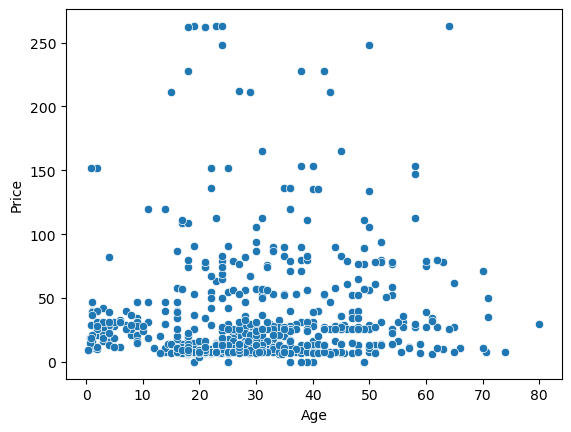

In [84]:
df_1 = df.copy()[['Age', 'Price']]

sns.scatterplot(x = 'Age', y = 'Price', data = df_1)
## We see existence of 2 outlier values. K means is sensitive to outliers, hence dropping them

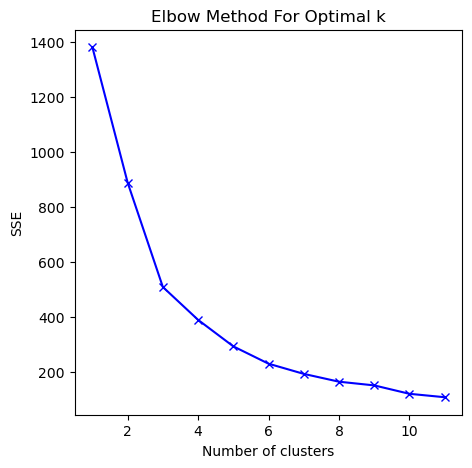

In [85]:
from sklearn.cluster import KMeans

## Scale data
X = df_1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_1)

distances = []
clusters = range(1,12)

for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster, init = 'random', random_state = 0)
    kmeans.fit(X_scaled)
    distances.append(kmeans.inertia_)

plt.figure(figsize=(5, 5))
plt.plot(clusters, distances, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## We can notice a clear elbow at n = 3 clusters, there is no clear elbow after n = 3

In [86]:
## Silhouette Score to double check for ideal number of clusters
from sklearn.metrics import silhouette_score

scores = []

k_max = 12

for k in range(2, k_max+1):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(X_scaled)
    labels = kmeans.labels_
    scores.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

<Axes: >

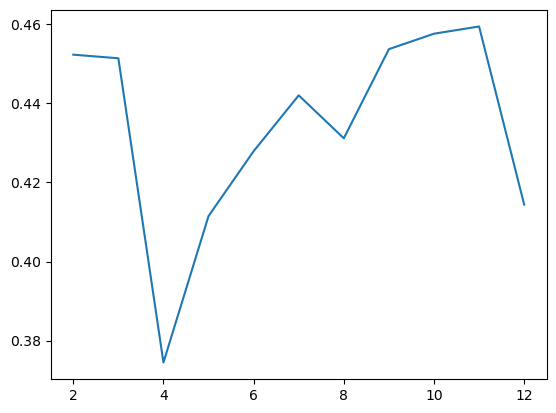

In [87]:
sns.lineplot(x = [2,3,4,5,6,7,8,9,10,11,12], y = scores)
## It can be observed that as the number of clusters increases, the silhouette score increases which is expected
## Hence, from the 2 plot, we can conclude that k = 3 should be a good number of clusters for the given data,
## also because beyond 5 clusters, it becomes difficult to interpret the results

In [88]:
kmeans = KMeans(n_clusters = 3, random_state = 0, init = 'random')
kmeans.fit(X_scaled)
df_1['Clusters'] = kmeans.labels_

<Axes: xlabel='Clusters'>

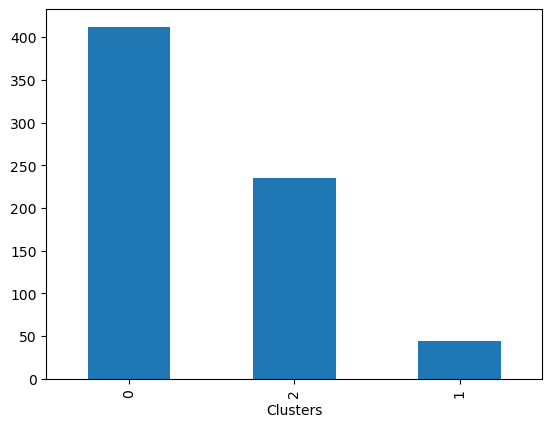

In [89]:
df_1['Clusters'].value_counts().plot(kind = 'bar') ## Majority of the data is in cluster 0

<Axes: xlabel='Age', ylabel='Price'>

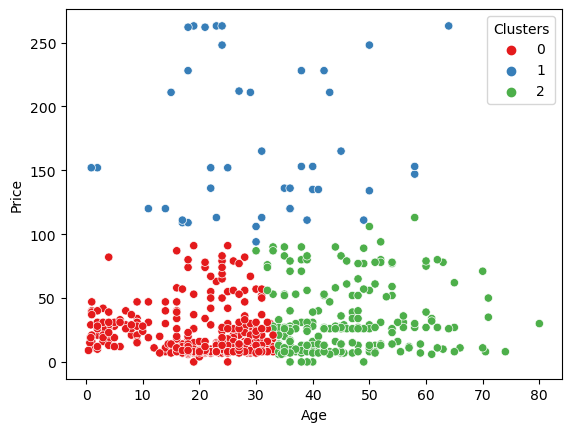

In [90]:
sns.scatterplot(x = 'Age', y = 'Price', hue = 'Clusters', data = df_1, palette="Set1")

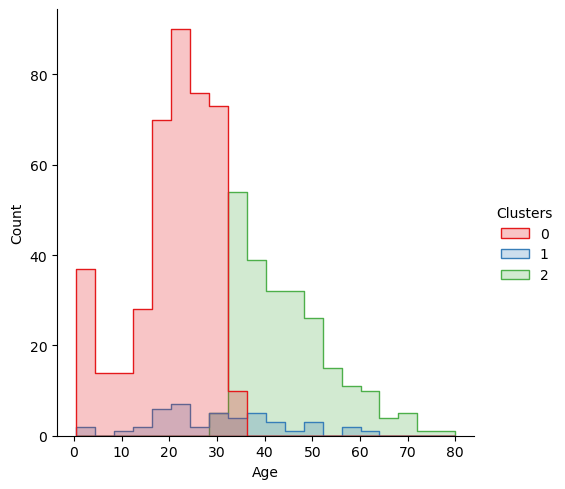

In [91]:
sns.displot(data=df_1, x='Age', hue='Clusters', element='step', common_norm=False, palette = 'Set1')
## It can be observed that cluster 1 contains young people, cluster 2 older population cluster 3 is a mix

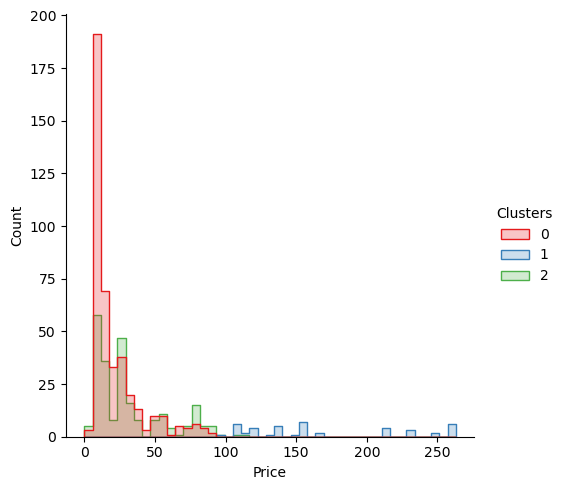

In [92]:
sns.displot(data=df_1, x='Price', hue='Clusters', element='step', common_norm=False, palette = 'Set1')
## It can be observed that clusters 1 and 3 is a mix of prices but cluster 1 majorly contains cheaper tickets. 
## Cluster 3 mostly has the more pricier/ expensive tickets